In [18]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import FixedLocator
from matplotlib import patheffects
import mplcursors

# 538 Data Replication:

"Congress today is older than it's ever been," published on April 3rd 2023 by Geoffrey Skelly on https://fivethirtyeight.com/features/aging-congress-boomers/

The goal of this replication is to test its reproduciblity and look for potential areas to further explore.

In [19]:
congress_demographics = pd.read_csv('data_aging_congress.csv')
"""""
data and party codes found here: https://voteview.com/articles/data_help_parties

common codes are 100 for Democratic,  200 for Republican , and 328 for independents

"""""


'""\ndata and party codes found here: https://voteview.com/articles/data_help_parties\n\ncommon codes are 100 for Democratic,  200 for Republican , and 328 for independents\n\n'

In [20]:
# Clean every dataset ! 
#organizing columns by convention

for col in congress_demographics.columns:
        congress_demographics.columns = [x.lower() for x in congress_demographics.columns] 
        congress_demographics.columns = congress_demographics.columns.str.replace(' ', '_')
congress_demographics['chamber'] = congress_demographics['chamber'].apply(str.lower)
congress_demographics['generation'] = congress_demographics['generation'].apply(str.lower)

#creating dummy variables for chamber variable

congress_demographics = pd.get_dummies(congress_demographics, columns=['chamber'])

#converting string to date-time for start_date variable
congress_demographics['start_date'] = pd.to_datetime(congress_demographics['start_date'],  infer_datetime_format=True)

Skller proports that congress today is older than it's ever been. Today, the median age of Congress is 59; with Senate being 65, and house 58(for the fourth time in a row). Before 2000, the maximum medians were less than 60 and 55 respectively. He derives these stats from: 

In [21]:
senate_demographics = congress_demographics.loc[congress_demographics['chamber_senate'] == 1]
house_demographics  = congress_demographics.loc[congress_demographics['chamber_house']   == 1]

congress_gb_congress = congress_demographics.groupby('congress').median(numeric_only = True).reset_index()
senate_gb_congress   = senate_demographics.groupby('congress').median(numeric_only = True).reset_index()
house_gb_congress    = house_demographics.groupby('congress').median(numeric_only = True).reset_index()

#current congress median
a = congress_gb_congress['age_years'].max()
b = senate_gb_congress['age_years'].max()
c = house_gb_congress['age_years'].max()
print(f'Todays Medians: \n Current Congress: {a} \n\n Current Senate: {b}  \n\n Current House: {c}')

Todays Medians: 
 Current Congress: 59.3730321697468 

 Current Senate: 65.264887063655  

 Current House: 58.2751540041068


In [22]:
senate_gb_congress2 = senate_gb_congress.merge(congress_demographics, on = 'congress')[['congress', 'start_date', 'age_years_x']]
house_gb_congress2   = house_gb_congress.merge(congress_demographics, on = 'congress')[['congress', 'start_date', 'age_years_x']]

senate_gb_congress2['start_date'] =pd.to_datetime(senate_gb_congress2['start_date'])
house_gb_congress2['start_date']  =pd.to_datetime(house_gb_congress2['start_date'])

def max_years_before_2000_senate(x):
    a = x[['start_date', 'age_years_x']]
    a = a.loc[x['start_date'] < pd.to_datetime('2000-01-01')].drop('start_date', axis = 1)
    a = a.sort_values(by = 'age_years_x', ascending = False) 
    value = round(a.at[0,'age_years_x'],2)
    if value < 60:
        print(f' The max senate median age was {value} before 2000. No senate had a median age over 60.')
        return True
    else: 
        print('He was wrong.')
    

def max_years_before_2000_house(x):
    a = x[['start_date', 'age_years_x']]
    a = a.loc[x['start_date'] < pd.to_datetime('2000-01-01')].drop('start_date', axis = 1)
    a = a.sort_values(by = 'age_years_x', ascending = False) 
    value = round(a.at[0,'age_years_x'],2)
    if value < 55:
        print(f' The max house median age was {value} before 2000. No house had a median age over 55.')
        return True
    else: 
        print("He was wrong")
print(max_years_before_2000_senate(senate_gb_congress2), max_years_before_2000_house(house_gb_congress2))    

 The max senate median age was 56.84 before 2000. No senate had a median age over 60.
 The max house median age was 49.67 before 2000. No house had a median age over 55.
True True


and provides the following graphic:

![Alt text](Screenshot%202023-05-24%20134604.png)

For Replication: 



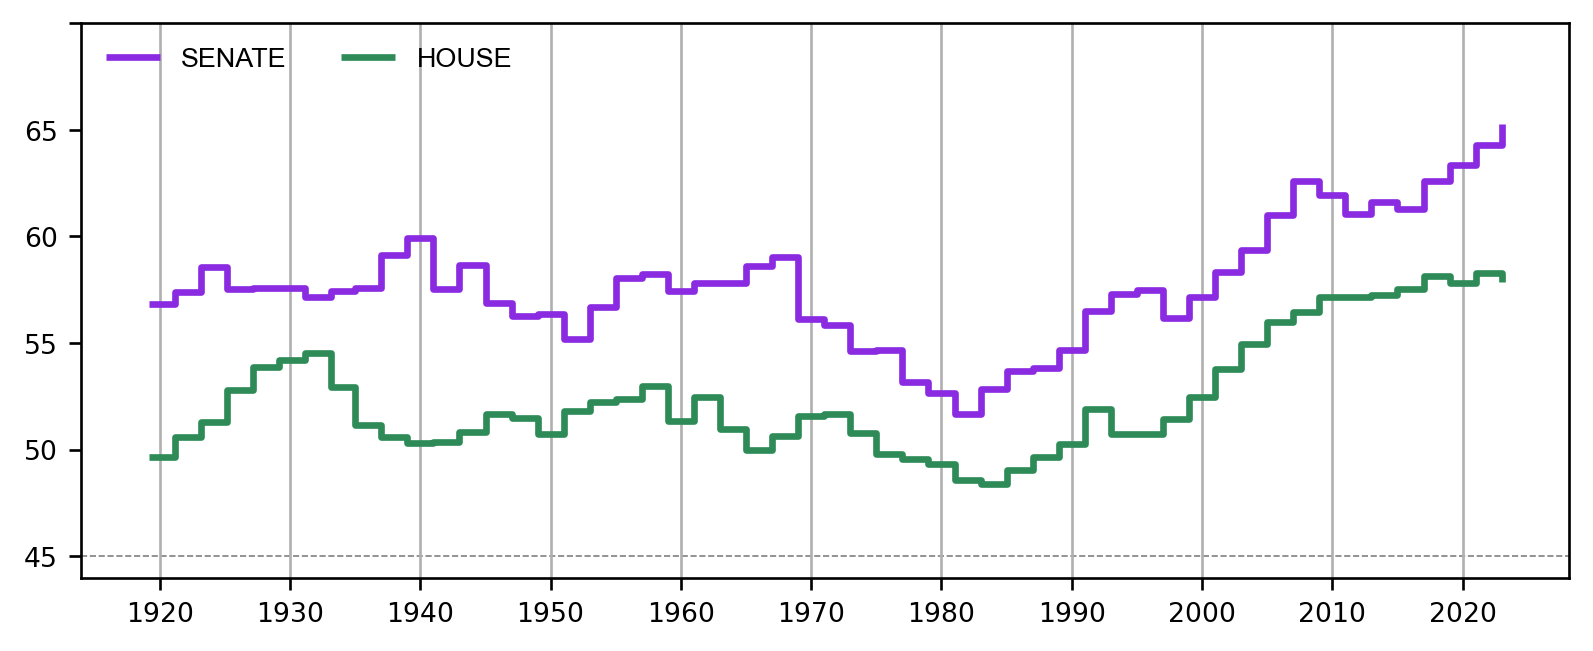

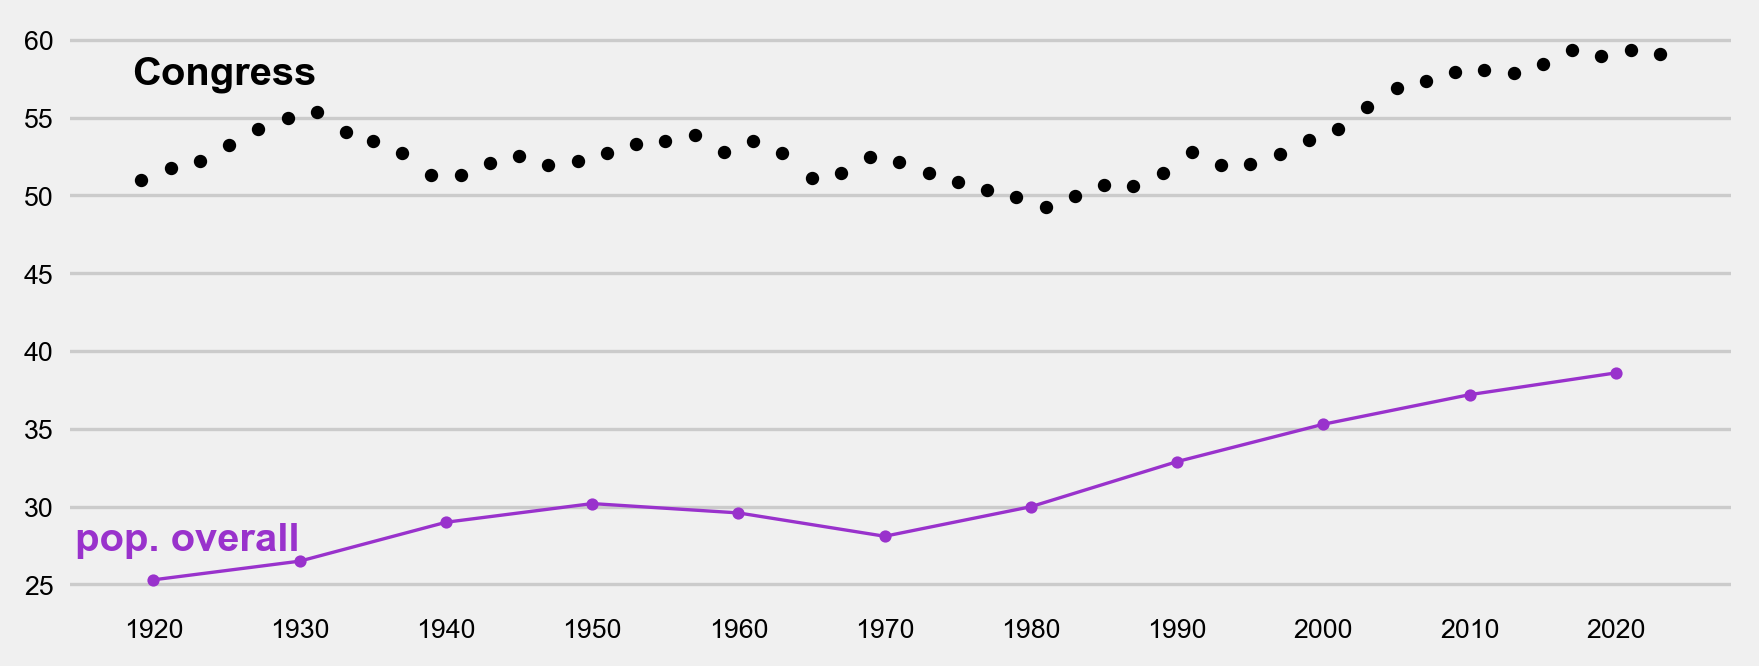

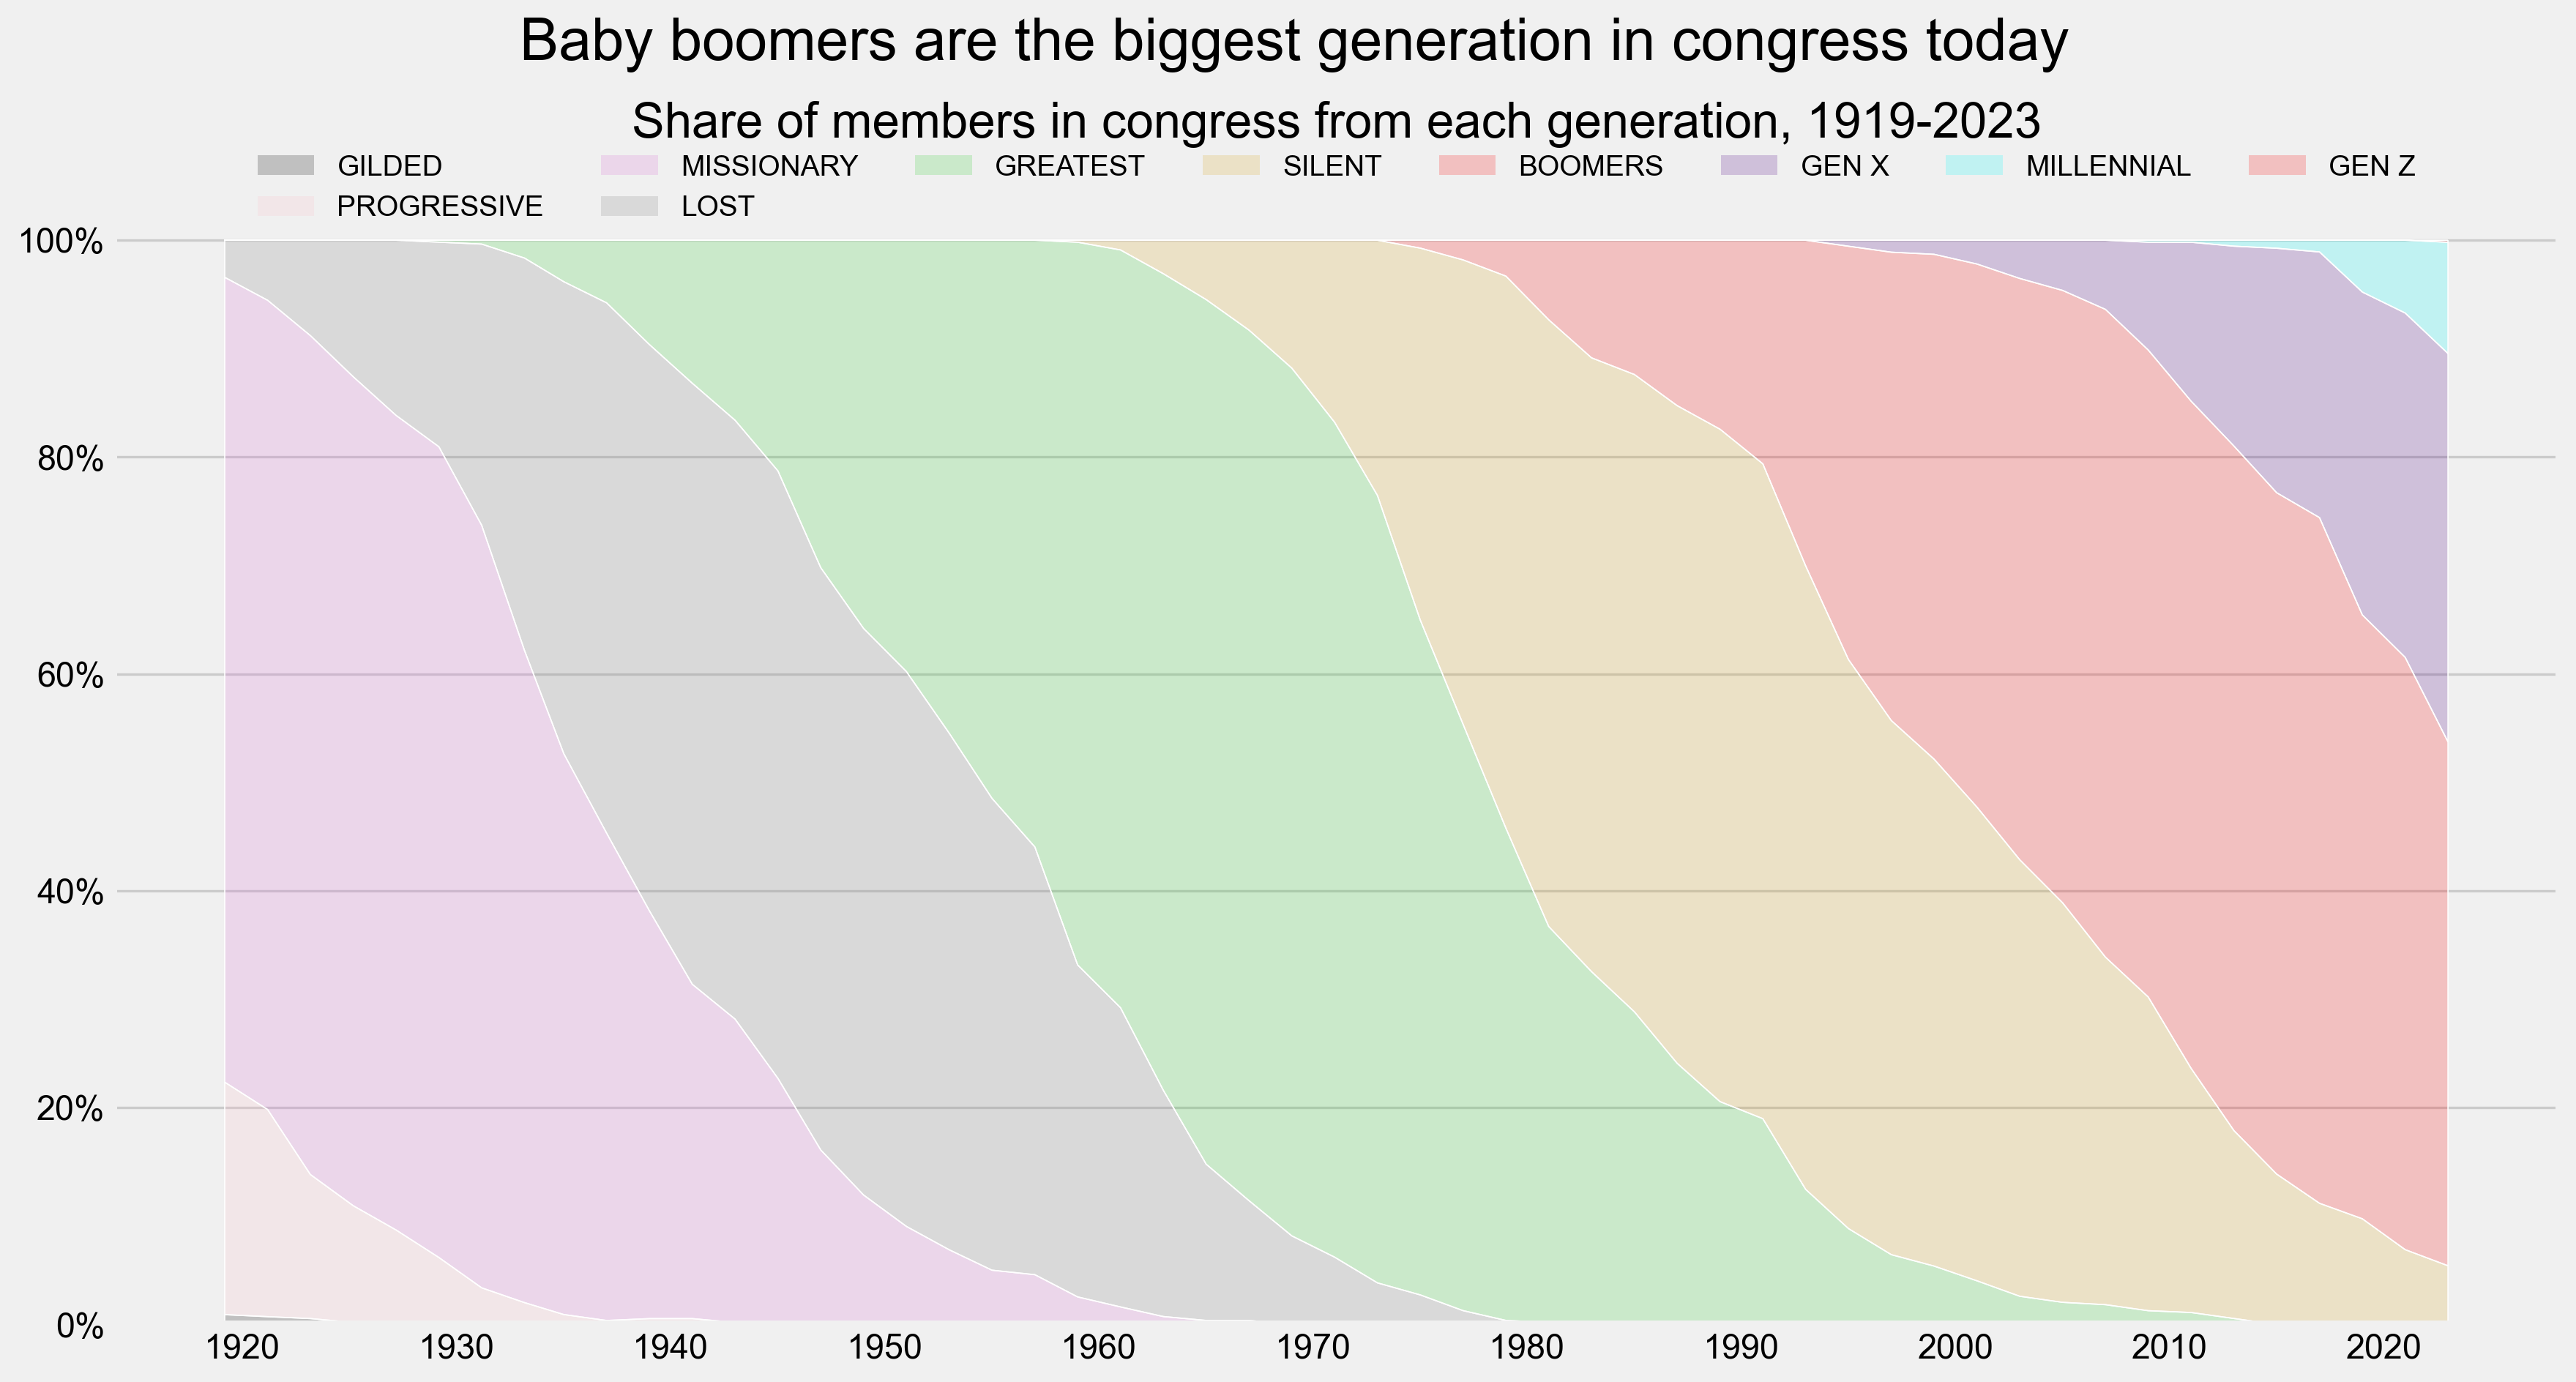

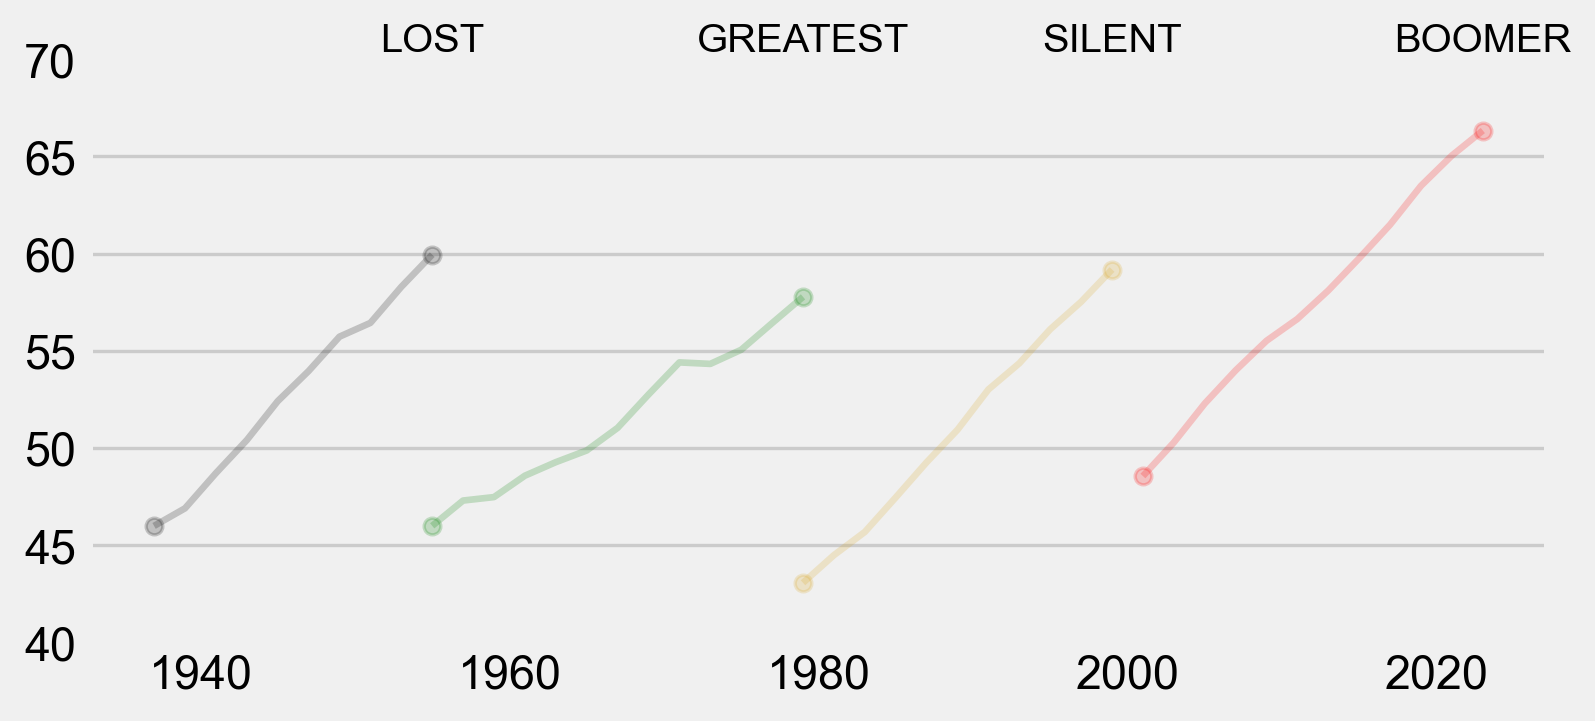

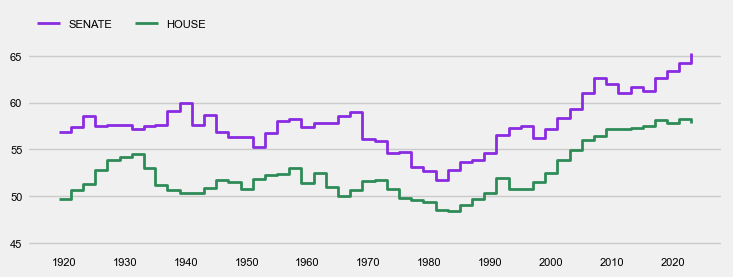

In [23]:
senate_demographics = congress_demographics.loc[congress_demographics['chamber_senate'] == 1]
house_demographics  = congress_demographics.loc[congress_demographics['chamber_house']   == 1]

senate_demographics_med_age =  senate_demographics.groupby('start_date').median(numeric_only = True).reset_index(drop = False)
house_demographics_med_age  =  house_demographics.groupby('start_date').median(numeric_only = True).reset_index(drop = False)

font_family = 'Arial'

Xs = senate_demographics_med_age['start_date']
ys = senate_demographics_med_age['age_years']

Xh = house_demographics_med_age['start_date']
yh = house_demographics_med_age['age_years']

fig, ax = plt.subplots(figsize=[8, 3.])
style.use('fivethirtyeight')
style.use({'font.family': font_family})
ax.grid(axis='x')
ax.plot(Xs, ys, color='BlueViolet',drawstyle = 'steps-post', label='SENATE', linewidth = 2 )
ax.plot(Xh, yh, color='seagreen', drawstyle = 'steps-post',  label='HOUSE', linewidth = 2)

# Set the y-axis tick locator to increment by 5
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

date_format = mdates.DateFormatter('%Y')  # Customize the date format as per your needs
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()  # Treat x-axis values as dates

# Set the x-axis tick locator to increment by 10 years
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.spines['bottom'].set_visible(True)
ax.axhline(45, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Set the y-axis tick locator to increment by 5
yticks = [45, 50, 55, 60, 65, 70]
yticklabels = [str(y) for y in yticks]
yticklabels[-1] = ''  # Remove tick label for 70
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

ax.legend(loc='upper left', ncol=2, fontsize='xx-small', frameon=False)



plt.show()

Skeller then moves on to argue that the country's aging population is most responsible for this trend, as well as the disproportionate amount of baby boomers. He uses the census data from 2920-2020 to plot the age difference from th population to congress. He does not explicitly name where from the census beaureu it came from, but I was able to find this chart as well as two additional data points from the census and Statista.com using google.

![Alt text](Screenshot%202023-05-24%20165848.png)

We can easily convert this to a dataframe: 

In [24]:
age_dict ={
    "year" : [1920, 1930, 1940, 1950, 1960, 1970,1980, 1990, 2000,2010,2020],
    "age"  : [25.3, 26.5, 29., 30.2, 29.6, 28.1,30,32.9, 35.3,37.2,38.6 ]}
census_age = pd.DataFrame(age_dict).reset_index()


Skeller also included a median age for the population that was 25+ to account for children(who can not vote). I was unable to reasonably find this data. He produces this graph: 

![Alt text](Screenshot%202023-05-24%20170823.png)

Replication: 

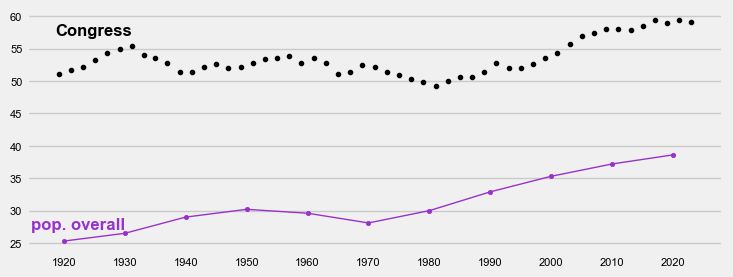

In [25]:
congress_grouped = congress_demographics.groupby('start_date').median(numeric_only = True).reset_index(drop = False)

X = congress_grouped['start_date']
y = congress_grouped['age_years']

xpop = pd.to_datetime(census_age['year'], format='%Y')
ypop = census_age['age']

fig, ax = plt.subplots(figsize=[8, 3.])
style.use('fivethirtyeight')

ax.grid(axis='x')
ax.plot(X, y, color='black', linestyle = '',marker = 'o', markersize = 3 ,label = 'congress')
ax.plot(xpop, ypop, color='darkorchid',  label='pop. overall', linewidth = 1)
ax.scatter(xpop, ypop, color = 'darkorchid', s = 10)


date_format = mdates.DateFormatter('%Y')  
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()  # Treat x-axis values as dates

# Set the x-axis tick locator to increment by 10 years
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.spines['bottom'].set_visible(True)
ax.axhline(45, color='gray', linestyle='--', linewidth=0.5, zorder=0)

ax.text(X.iloc[6], y.iloc[-3], 'Congress', color='black', ha='right', va='top', weight='bold', transform=ax.transData, fontsize = 12)
ax.text(xpop.iloc[1], ypop.iloc[2], 'pop. overall', color='darkorchid', ha='right', va='top', weight='bold', transform=ax.transData, fontsize = 12)



ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)


    
plt.show()

Skeller then transitions his article to show the generational compostion of congress historically. 


In [26]:
generations1 = congress_demographics[['start_date', 'generation']]
generations2 = pd.get_dummies(generations1['generation'])
generations = generations1.join(generations2).drop(columns=['generation']).groupby('start_date').sum()

def calculate_percentage(row):
    total = row.sum()
    return row/total * 100

dummy_percentages = generations.apply(calculate_percentage, axis =1).sort_values(by = 'start_date', ascending=False)

dummy_percentages = dummy_percentages.div(dummy_percentages.sum(axis=1), axis=0) * 100
dummy_percentages = dummy_percentages[['gilded', 'progressive','missionary','lost','greatest','silent','boomers','gen x','millennial','gen z']]
dummy_percentages.columns = dummy_percentages.columns.str.upper()

![Alt text](Screenshot%202023-05-24%20174556.png)

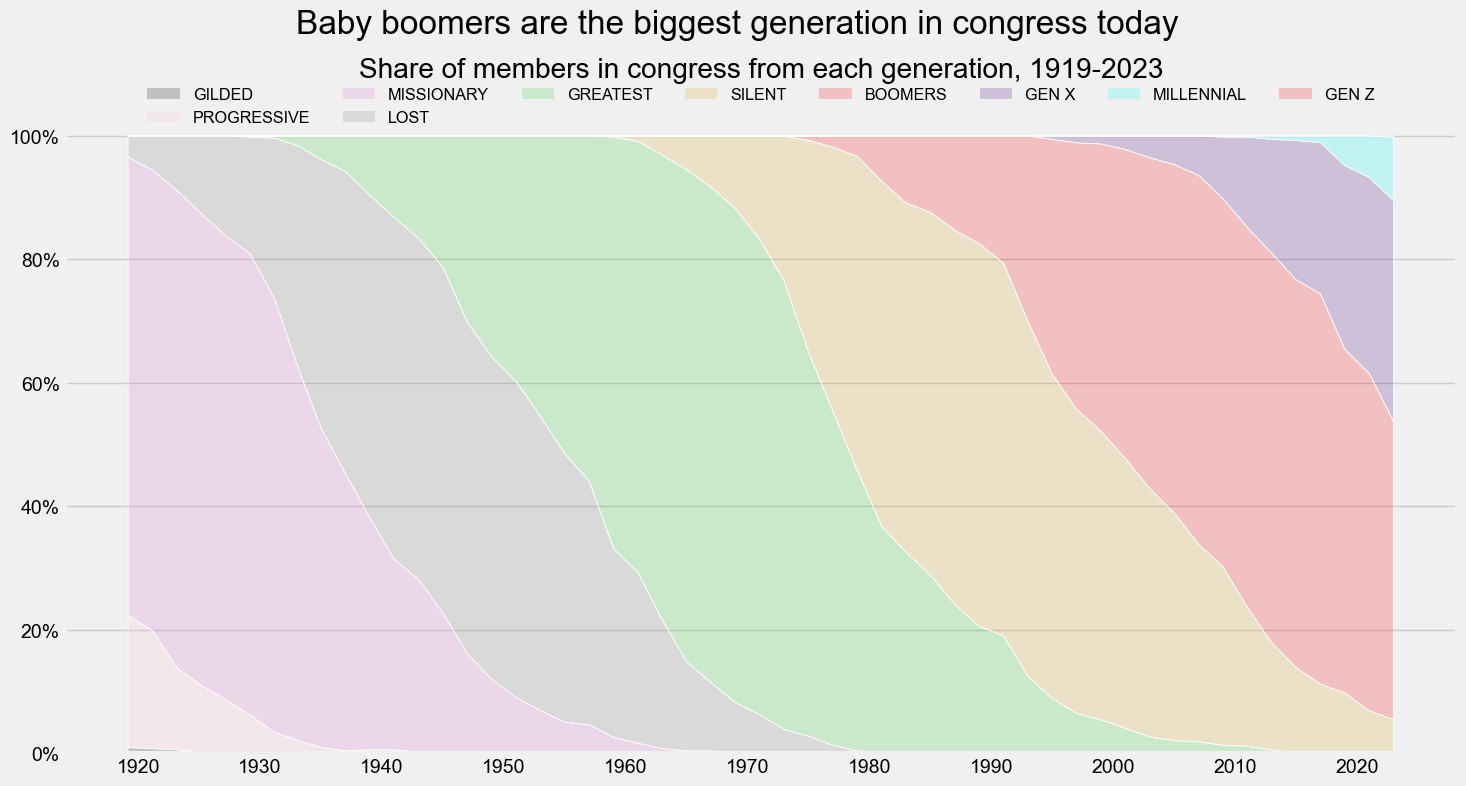

In [27]:

# Calculate the normalized percentages
df_normalized = dummy_percentages.div(dummy_percentages.sum(axis=1), axis=0) * 100

columns = df_normalized.columns
data = df_normalized.values.T

color_palette = ['black', 'pink', 'orchid', 'gray', 'limegreen', 'goldenrod', 'red', 'indigo', 'cyan', 'red']
alphas = [0.2] * len(columns)  # Initialize alpha values for all areas

# Create a stacked area plot for all categorical dummy variables
fig, ax = plt.subplots(figsize=[16, 8])
areas = ax.stackplot(df_normalized.index, data, labels=columns, alpha=alphas, colors=color_palette)

# Create white lines following the border of each category's area
for area in areas:
    path = area.get_paths()[0]  # Get the path of the current area
    vertices = path.vertices  # Get the vertices of the path
    x = vertices[:, 0]  # X-coordinates of the vertices
    y = vertices[:, 1]  # Y-coordinates of the vertices
    ax.plot(x, y, color='white', linewidth=0.5)

# Set plot labels and title
suptitle = plt.suptitle('Baby boomers are the biggest generation in congress today', size=24)
suptitle.set_y(1.)

# Add legend and adjust its position
ax.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=8, fontsize='small', frameon=False)
ax.set_title("Share of members in congress from each generation, 1919-2023", pad=20)

ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(axis='x')
ax.spines['bottom'].set_visible(True)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.yaxis.set_major_formatter(ticker.PercentFormatter())

text = ax.text(0, 0, '', ha='left', va='bottom', backgroundcolor='none', zorder=10,
               path_effects=[patheffects.withStroke(linewidth=3, foreground='white')], size=8)

prev_annotation = None
gray_line, = ax.plot([], [], color='black', linewidth=0.8, linestyle='--', alpha=0.7, visible=False)

def on_hover(event):
    if event.inaxes == ax:
        global prev_annotation
        for i, area in enumerate(areas):
            alpha_values = np.linspace(0.2, 1, len(areas))
            area.set_alpha(alpha_values[i])
            path = area.get_paths()[0]  # Get the path of the current area
            vertices = path.vertices  # Get the vertices of the path
            x = vertices[:, 0]  # X-coordinates of the vertices
            y = vertices[:, 1]  # Y-coordinates of the vertices
            if area.contains(event)[0]:
                x_mouse, y_mouse = event.xdata, event.ydata
                year = int(mdates.num2date(x_mouse).year)
                x_mouse_timestamp = pd.Timestamp(year=year, month=1, day=1)
                corresponding_dates = pd.DatetimeIndex(df_normalized.index)
                corresponding_dates = corresponding_dates[corresponding_dates.year == year]
                if not corresponding_dates.empty:
                    target_date = corresponding_dates[np.abs(corresponding_dates - x_mouse_timestamp).argmin()]
                    column_name = df_normalized.columns[i]
                    percentage = df_normalized.loc[target_date, column_name]
                    text.set_text(f"{column_name}\nYear: {target_date.strftime('%Y')}\nPercentage: {percentage:.2f}%")
                    # Increase alpha of legend
                    ax.legend_.legend_handles[i].set_alpha(1.0)
                    # Change font color of annotation to match category color
                    
                    text.set_alpha(1)

                    # Draw the gray line
                    category_path = area.get_paths()[0]
                    category_x = category_path.vertices[:, 0]
                    category_y = category_path.vertices[:, 1]
                    category_bottom = category_y[np.abs(category_x - x_mouse).argmin()]
                    category_top = category_y[::-1][np.abs(category_x - x_mouse).argmin()]  # Reverse y-coordinates
                    line_x = np.full_like(category_x, x_mouse)
                    line_y = np.linspace(category_bottom, category_top, len(category_x))
                    gray_line.set_data(line_x, line_y)
                    gray_line.set_visible(True)
                else:
                    if prev_annotation:
                        text.set_text(prev_annotation)
                    else:
                        text.set_text(f"{columns[i]}\nYear: {year}\nPercentage: N/A")
                text.set_position((x_mouse, y_mouse))
                text.set_visible(True)  # Show the annotation
                prev_annotation = text.get_text()
            else:
                area.set_alpha(0.2)
                # Reset alpha of legend
                ax.legend_.legend_handles[i].set_alpha(0.2)
        ax.figure.canvas.draw_idle()  # Redraw the figure

    else:
        text.set_text("")
        text.set_visible(False)  # Hide the annotation
        gray_line.set_visible(False)  # Hide the gray line
        # Reset alpha of legend
        for handle in ax.legend_.legend_handles:
            handle.set_alpha(0.2)
        # Reset font color of annotation
        text.set_color('black')

fig.canvas.mpl_connect('motion_notify_event', on_hover)
plt.show()


Skeller then compares the median ages of each of the 4 largest generations in each Congress since 1937: 

![Alt text](Screenshot%202023-05-25%20161543.png)

In [28]:
generations_1937 = congress_demographics.loc[congress_demographics['start_date'] > pd.to_datetime('1936-12-31')]

In [29]:
generation_counts = generations_1937.groupby('start_date')['generation'].value_counts().unstack(fill_value=0)

# Step 2: Calculate the percentage of each generation relative to the total count for each year
generation_percentages = generation_counts.div(generation_counts.sum(axis=1), axis=0)

# Step 3: Find the dominant generation for each year
dominant_generations = generation_percentages.idxmax(axis=1)

# Step 4: Calculate the year span for each dominant generation
year_spans = {}
current_generation = None
start_year = None
for year, generation in dominant_generations.items():
    if generation != current_generation:
        if current_generation is not None:
            year_spans[current_generation] = (start_year, year - pd.DateOffset(days=1))
        current_generation = generation
        start_year = year
year_spans[current_generation] = (start_year, generations_1937['start_date'].max())

# Step 5: Print the year span for each dominant generation
for generation, year_span in year_spans.items():
    print("Generation:", generation)
    print("Year Span:", year_span[0].year, "to", year_span[1].year)
    print()

Generation: lost
Year Span: 1937 to 1955

Generation: greatest
Year Span: 1955 to 1979

Generation: silent
Year Span: 1979 to 2001

Generation: boomers
Year Span: 2001 to 2023



In [30]:

generations_1937 = generations_1937[['start_date','age_years', 'generation']].sort_values('generation')

lost = generations_1937.loc[(generations_1937['generation'] == 'lost') 
                            & (generations_1937['start_date'] < pd.to_datetime('1956-01-01'))].reset_index(drop = True).drop(
                            columns=['generation']).groupby('start_date').median().reset_index()

greatest = generations_1937.loc[(generations_1937['generation'] == 'greatest') 
                                & (generations_1937['start_date'] > pd.to_datetime('1954-12-31')) & 
                                (generations_1937['start_date'] < pd.to_datetime('1980-01-01'))].reset_index(drop = True).drop(columns=['generation']).groupby('start_date').median().reset_index()

silent = generations_1937.loc[(generations_1937['generation'] == 'silent')
                               &(generations_1937['start_date'] > pd.to_datetime('1978-12-31'))
                               &(generations_1937['start_date']< pd.to_datetime('2001-01-01'))].reset_index(drop = True).drop(columns=['generation']).groupby('start_date').median().reset_index()

boomer  = generations_1937.loc[(generations_1937['generation'] == 'boomers')
                               &(generations_1937['start_date']> pd.to_datetime('2000-12-31'))].reset_index(drop = True).drop(columns=['generation']).groupby('start_date').median().reset_index()



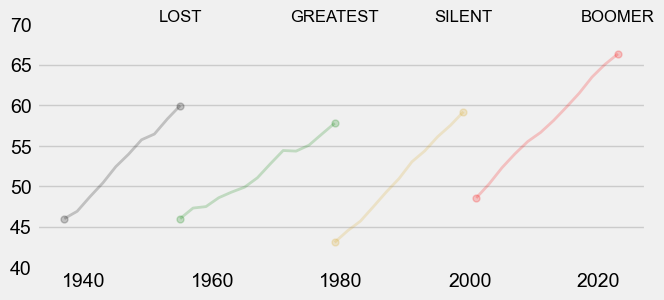

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[7, 3])

# Your data
xlost = lost['start_date'].dt.year
ylost = lost['age_years']

xgreatest = greatest['start_date'].dt.year
ygreatest = greatest['age_years']

xsilent = silent['start_date'].dt.year
ysilent = silent['age_years']

xboomer = boomer['start_date'].dt.year
yboomer = boomer['age_years']

# Plot lines
line_lost, = ax.plot(xlost, ylost, color='black', linewidth=2, marker='o', markersize=5, markevery=[0, -1], label='LOST')
line_greatest, = ax.plot(xgreatest, ygreatest, color='green', linewidth=2, marker='o', markersize=5, markevery=[0, -1], label='GREATEST')
line_silent, = ax.plot(xsilent, ysilent, color='goldenrod', linewidth=2, marker='o', markersize=5, markevery=[0, -1], label='SILENT')
line_boomer, = ax.plot(xboomer, yboomer, color='red', linewidth=2, marker='o', markersize=5, markevery=[0, -1], label='BOOMER')

# Set alphas for lines
line_lost.set_alpha(0.2)
line_greatest.set_alpha(0.2)
line_silent.set_alpha(0.2)
line_boomer.set_alpha(0.2)

# Set axes limits and grid
ax.set_ylim(40, 70)
ax.grid(axis='x')

line_names = {line_lost: 'LOST', line_greatest: 'GREATEST', line_silent: 'SILENT', line_boomer: 'BOOMER'}
label_y = 70
label_fontsize = 12
# to label
for line in [line_lost, line_greatest, line_silent, line_boomer]:
        line_name = line_names[line]
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        index = np.argmin(np.abs(ydata - 70))
        x_value = xdata[index]
        ax.text(x_value, label_y, line_name, ha='center', va='bottom', fontsize=label_fontsize)
# to show labels while hovering       
def labels(): 
    for line in [line_lost, line_greatest, line_silent, line_boomer]:
        line_name = line_names[line]
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        index = np.argmin(np.abs(ydata - 70))
        x_value = xdata[index]
        ax.text(x_value, label_y, line_name, ha='center', va='bottom', fontsize=label_fontsize)

def on_hover(event):
    # Set alphas for lines
    for line in [line_lost, line_greatest, line_silent, line_boomer]:
        line.set_alpha(0.2)

    # Get current x-coordinate
    if event.xdata is not None:
        x_mouse = event.xdata

        # Find the line corresponding to the x-coordinate
        closest_line = None
        closest_distance = float('inf')

        for line in [line_lost, line_greatest, line_silent, line_boomer]:
            xdata = np.array(line.get_xdata())
            ydata = np.array(line.get_ydata())

            distance = np.abs(xdata - x_mouse)
            index = np.argmin(distance)

            if distance[index] < closest_distance:
                closest_line = line
                closest_distance = distance[index]

        # Darken the alpha of the closest line
        if closest_line:
            closest_line.set_alpha(1.0)

            # Get the corresponding x, y values
            xdata = np.array(closest_line.get_xdata())
            ydata = np.array(closest_line.get_ydata())

            # Find the index of the closest x-coordinate
            index = np.argmin(np.abs(xdata - x_mouse))

            # Get the corresponding x, y values
            x_value = xdata[index]
            y_value = ydata[index]

            # Get the line's name
            line_name = line_names[closest_line]

            # Create the annotation text
            annotation_text = f'{line_name} \n{int(x_value)} \n{int(y_value)}'

            # Remove previous annotations
            for annotation in ax.texts:
                annotation.remove()

            # Add the new annotation to the plot
            ax.annotate(annotation_text, (x_value, y_value), xytext=(10, -10),
                        textcoords='offset points', ha='left', va='top',
                        fontsize=8, alpha=0.7, bbox=dict(facecolor='none', edgecolor='none'))

    else:
        # Remove the annotation when the cursor is outside the plot
        for annotation in ax.texts:
            annotation.remove()
    labels()
    # Redraw the figure to update the plot
    fig.canvas.draw_idle()

# Connect hover function to the plot
fig.canvas.mpl_connect('motion_notify_event', on_hover)

# Show the plot
plt.show()
